In [1]:
import cv2
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
from os import listdir

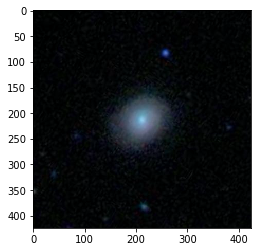

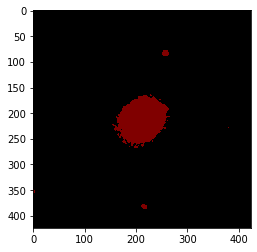

(<matplotlib.image.AxesImage at 0x7fac308bcbd0>, None)

In [2]:
#extract 100 images from galaxy-zoo dataset: mv 'ls | head -100' ../small-training/
imagePath = '/home/noranikoloska/Documents/MasinskaVizija/small-training/100008.jpg'

img = cv2.imread(imagePath)
plt.imshow(img), plt.show()

grayImage = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
retval, threshold = cv2.threshold(grayImage, 50, 255, cv2.THRESH_BINARY)
img[threshold == 255] = [128,0,0]
img[threshold != 255] = [0, 0, 0]

plt.imshow(img, cmap="gray"), plt.show()

In [4]:
df = pd.read_csv('/home/noranikoloska/Documents/MasinskaVizija/training_solutions_rev1.csv')
df.head()

# Calculate Max Class

df['MaxClass'] = df.loc[:, df.columns != 'GalaxyID'].idxmax(axis=1)
df['MaxClass'] = df['MaxClass'].str.replace('Class', '')
df.head()

,GalaxyID,Class1.1,Class1.2,Class1.3,Class2.1,Class2.2,Class3.1,Class3.2,Class4.1,Class4.2,...,Class10.1,Class10.2,Class10.3,Class11.1,Class11.2,Class11.3,Class11.4,Class11.5,Class11.6,MaxClass
0,100008,0.383147,0.616853,0.000000,0.000000,0.616853,0.038452,0.578401,0.418398,0.198455,...,0.279952,0.138445,0.000000,0.000000,0.092886,0.0,0.0,0.0,0.325512,6.2
1,100023,0.327001,0.663777,0.009222,0.031178,0.632599,0.467370,0.165229,0.591328,0.041271,...,0.000000,0.131378,0.459950,0.000000,0.591328,0.0,0.0,0.0,0.000000,6.2
2,100053,0.765717,0.177352,0.056931,0.000000,0.177352,0.000000,0.177352,0.000000,0.177352,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,6.2
3,100078,0.693377,0.238564,0.068059,0.000000,0.238564,0.109493,0.129071,0.189098,0.049466,...,0.094549,0.000000,0.094549,0.189098,0.000000,0.0,0.0,0.0,0.000000,1.1
4,100090,0.933839,0.000000,0.066161,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,6.2


In [7]:
trainingImagesPath = '/home/noranikoloska/Documents/MasinskaVizija/small-training'

segmentedImagesPath = '/home/noranikoloska/Documents/MasinskaVizija/Tensorflow/models/research/deeplab/datasets/GalaxyZoo/dataset/SegmentationClass'
jpegImagesPath = '/home/noranikoloska/Documents/MasinskaVizija/Tensorflow/models/research/deeplab/datasets/GalaxyZoo/dataset/JPEGImages'

label_colours = [(0,0,0)
                # 0 = background
                ,(128,0,0),(0,128,0),(128,128,0),(0,0,128),(128,0,128)]
                # 1 = Class1.1, 2 = Class1.2, 3 = Class1.3, 4 = Class6.1, 5 = Class6.2

for fileName in listdir(trainingImagesPath):
    
    # Calculate class and color
    imageClass = df.loc[df['GalaxyID'] == int(fileName.replace('.jpg', ''))]['MaxClass'].values[0]
    if(imageClass == '1.1'):
        color = label_colours[1]
    elif(imageClass == '1.2'):
        color = label_colours[2]
    elif(imageClass == '1.3'):
        color = label_colours[3]
    elif(imageClass == '6.1'):
        color = label_colours[4]
    else:
        color = label_colours[5]
    
    # Load image
    img = cv2.imread(trainingImagesPath + "/" + fileName)
    segmentedImage = img.copy()
    
    # Create segmented image
    grayImage = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    retval, threshold = cv2.threshold(grayImage, 50, 255, cv2.THRESH_BINARY)
    segmentedImage[threshold == 255] = color
    segmentedImage[threshold != 255] = label_colours[0]

    # For visualisation purposes
    # plt.imshow(segmentedImage, cmap="gray"), plt.show()
    
    # Save images in designated folders
    # Note: the image file name must remain the same
    cv2.imwrite(jpegImagesPath + '/' + fileName, img)
    cv2.imwrite(segmentedImagesPath + '/' + fileName, segmentedImage)

In [ ]:
# run convert_rgb_to_index.py
# run build.py -- from venv with Tensorflow 1.15

# make tfrecord folder and populate

# download VOC model as starting model and extract it in init
# run training script from models/research
# run evaluation script from models/research